In [2]:
import pandas as pd
pd.set_option('display.max_columns', 60)

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('ABIII_English.csv', dtype='str')
print(df.shape)

(14809, 296)


In [78]:
df_personal = pd.concat([df['qid'], df.loc[:,'q1001':'q2003']], axis=1)

df_personal = df_personal.rename(columns={'q1001':'age', 
                                          'q1002':'sex', 
                                          'q1004':'work?', 
                                          'q1005':'work_alt', 
                                          'q1006':'full/part',
                                          'q1006a':'sector', 
                                          'q1007':'position_public',
                                          'q1007a':'position_private', 
                                          'q1009':'unemployment',
                                          'q1010':'mar_status', 
                                          'q1011':'spouse_job',
                                          'q1011a':'computer',
                                          'q1011b':'car', 
                                          'q1012':'religion', 
                                          'q1012a':'denomination',
                                          'q1013':'housing',
                                          'q1014':'income', 
                                          'q1015':'household_income', 
                                          'q1016':'income_enough', 
                                          'q1017':'remittances',
                                          'q1019_1':'1st_language', 
                                          'q1019_2':'2nd_language',
                                          'q2003':'appearance'})
df_personal.head()

,qid,age,sex,q1003,q1003t,q1003yem,work?,work_alt,full/part,sector,position_public,position_private,unemployment,mar_status,spouse_job,computer,car,religion,denomination,housing,income,household_income,income_enough,remittances,1st_language,2nd_language,q1020jo,q2001ir,appearance
0,1,40,Male,Prepartory/Basic,NaN,NaN,Yes,NaN,Full time (30 hours or more a week),Private,NaN,Private sector employee,The job does not provide anything at the concl...,Married,Housewife,No,Yes,Muslim,NaN,Owned,19000,38000,Our household income does not cover our expens...,We do not receive anything,Arabic,Amazigh,NaN,NaN,NaN
1,2,41,Female,Mid-level diploma (professional or technical,NaN,NaN,Yes,NaN,Full time (30 hours or more a week),Public,A governmental employee,NaN,Pension at the conclusion of service,Married,"Professional such as lawyer, accountant, teach...",Yes,Yes,Muslim,NaN,Rented,Refuse,Refuse,Refuse,Refuse,Arabic,Amazigh,NaN,NaN,NaN
2,3,44,Male,Elementary,NaN,NaN,Yes,NaN,Full time (30 hours or more a week),Public,A governmental employee,NaN,Pension at the conclusion of service,Bachelor,NaN,Yes,Yes,Muslim,NaN,Other,20000,30000,Our household income does not cover our expens...,We do not receive anything,Arabic,Amazigh,NaN,NaN,NaN
3,4,56,Female,Elementary,NaN,NaN,No,A housewife,NaN,NaN,NaN,NaN,NaN,Married,"Professional such as lawyer, accountant, teach...",Yes,No,Muslim,NaN,Owned,Don't know,57000,Our household income does not cover our expens...,We do not receive anything,Arabic,Amazigh,NaN,NaN,NaN
4,5,48,Male,Elementary,NaN,NaN,Yes,NaN,Full time (30 hours or more a week),Private,NaN,Private sector employee,End of service gratuity,Married,Housewife,No,Yes,Muslim,NaN,Owned,24000,34000,Our household income does not cover our expens...,We do not receive anything,Arabic,Does not speak second language,NaN,NaN,NaN


In [79]:
df_personal = df_personal.replace({np.NaN:'', 'Missing':''})

df_personal['occupation'] = df_personal['work_alt'] + df_personal['position_public'] + df_personal['position_private']
df_personal = df_personal.drop(['work_alt','full/part','sector','position_public','position_private'], axis=1)

df_personal['education'] = df_personal['q1003'] + df_personal['q1003t'] + df_personal['q1003yem']
df_personal = df_personal.drop(['q1003','q1003t','q1003yem'], axis=1)

df_personal = df_personal.drop(['unemployment','religion','denomination',
                                'income_enough','remittances','1st_language',
                                '2nd_language','q1020jo','q2001ir','appearance'], axis=1)

df_personal = df_personal[['qid','age','sex','education','work?','occupation',
                           'mar_status','spouse_job','housing','car',
                           'computer','income','household_income']]

df_personal.head()

,qid,age,sex,education,work?,occupation,mar_status,spouse_job,housing,car,computer,income,household_income
0,1,40,Male,Prepartory/Basic,Yes,Private sector employee,Married,Housewife,Owned,Yes,No,19000,38000
1,2,41,Female,Mid-level diploma (professional or technical,Yes,A governmental employee,Married,"Professional such as lawyer, accountant, teach...",Rented,Yes,Yes,Refuse,Refuse
2,3,44,Male,Elementary,Yes,A governmental employee,Bachelor,,Other,Yes,Yes,20000,30000
3,4,56,Female,Elementary,No,A housewife,Married,"Professional such as lawyer, accountant, teach...",Owned,No,Yes,Don't know,57000
4,5,48,Male,Elementary,Yes,Private sector employee,Married,Housewife,Owned,Yes,No,24000,34000


In [80]:
df_personal['education'].value_counts()

Secondary                                       3192
Prepartory/Basic                                2831
Elementary                                      2398
ba                                              2363
Illiterate/No formal education                  2148
Mid-level diploma (professional or technical    1439
MA and above                                     247
Mid-level diploma/professional or technical)     101
Pre-high school diploma                           56
Refuse                                            29
                                                   5
Name: education, dtype: int64

In [81]:
df_personal['education'] = df_personal['education'].replace({'Mid-level diploma/professional or technical)':
                                                            'Mid-level diploma (professional or technical',
                                                            'Pre-high school diploma':'Prepartory/Basic',
                                                            'ba':'BA'})
df_personal['education'].value_counts()

Secondary                                       3192
Prepartory/Basic                                2887
Elementary                                      2398
BA                                              2363
Illiterate/No formal education                  2148
Mid-level diploma (professional or technical    1540
MA and above                                     247
Refuse                                            29
                                                   5
Name: education, dtype: int64

In [82]:
df_personal['education'] = pd.Categorical(df_personal['education'], categories=['Refuse',
                                                                               '',
                                                                               'Illiterate/No formal education',
                                                                               'Elementary',
                                                                               'Prepartory/Basic',
                                                                               'Secondary',
                                                                               'Mid-level diploma (professional or technical',
                                                                               'BA',
                                                                               'MA and above'], ordered=True)

In [83]:
df_personal['occupation'].value_counts()

A housewife                                                           4133
A governmental employee                                               2165
Unemployed                                                            1757
A student                                                             1317
Private sector employee                                                940
Retired                                                                843
Owner of a shop/grocery store                                          724
Manual laborer                                                         568
Craftsperson                                                           408
Working at the armed forces or the police                              360
                                                                       341
Professional such as lawyer, accountant, teacher, doctor, etc.         280
Agricultural worker/Owner of a farm                                    243
Employer/director of an i

In [84]:
print(sorted(df_personal['income'].unique(), reverse=True)[0:6])
print(sorted(df_personal['household_income'].unique(), reverse=True)[0:6])

['Refuse', 'Not specified', 'No income', "Don't know", '9900', '99']
['Refuse', 'Not specified', 'No income', "Don't know", '9900', '990']


In [85]:
df_personal[['income','household_income']] = df_personal[['income','household_income']].replace({'No income':'0',
                                                                                            'Refuse':np.NaN,
                                                                                            'Not specified':np.NaN,
                                                                                            'Don\'t know':np.NaN,
                                                                                            '':np.NaN}).astype('float')

df_personal.head()

,qid,age,sex,education,work?,occupation,mar_status,spouse_job,housing,car,computer,income,household_income
0,1,40,Male,Prepartory/Basic,Yes,Private sector employee,Married,Housewife,Owned,Yes,No,19000.0,38000.0
1,2,41,Female,Mid-level diploma (professional or technical,Yes,A governmental employee,Married,"Professional such as lawyer, accountant, teach...",Rented,Yes,Yes,NaN,NaN
2,3,44,Male,Elementary,Yes,A governmental employee,Bachelor,,Other,Yes,Yes,20000.0,30000.0
3,4,56,Female,Elementary,No,A housewife,Married,"Professional such as lawyer, accountant, teach...",Owned,No,Yes,NaN,57000.0
4,5,48,Male,Elementary,Yes,Private sector employee,Married,Housewife,Owned,Yes,No,24000.0,34000.0


In [86]:
df_personal = df_personal.replace({'':np.NaN, 'Don\'t know':np.NaN,
                                  'Refuse':np.NaN})
df_personal.isnull().sum()

qid                    0
age                   10
sex                    0
education             34
work?                 16
occupation           501
mar_status            14
spouse_job          5456
housing              103
car                   50
computer              48
income              4835
household_income    2699
dtype: int64

In [87]:
df_personal = pd.concat([df_personal, df.loc[:,'q800a':'q800c']], axis=1).rename(columns={'q800a':
                                                                                         'participate',
                                                                                         'q800b':
                                                                                         'why_par',
                                                                                         'q800c':
                                                                                         'why_not_par'})

df_personal.head()

,qid,age,sex,education,work?,occupation,mar_status,spouse_job,housing,car,computer,income,household_income,participate,why_par,why_not_par
0,1,40,Male,Prepartory/Basic,Yes,Private sector employee,Married,Housewife,Owned,Yes,No,19000.0,38000.0,"No, I did not",NaN,I did not care to participate / It was not imp...
1,2,41,Female,Mid-level diploma (professional or technical,Yes,A governmental employee,Married,"Professional such as lawyer, accountant, teach...",Rented,Yes,Yes,NaN,NaN,"No, I did not",NaN,I did not care to participate / It was not imp...
2,3,44,Male,Elementary,Yes,A governmental employee,Bachelor,NaN,Other,Yes,Yes,20000.0,30000.0,"No, I did not",NaN,Refuse
3,4,56,Female,Elementary,No,A housewife,Married,"Professional such as lawyer, accountant, teach...",Owned,No,Yes,NaN,57000.0,"No, I did not",NaN,I was afraid to participate in these demonstra...
4,5,48,Male,Elementary,Yes,Private sector employee,Married,Housewife,Owned,Yes,No,24000.0,34000.0,"No, I did not",NaN,I did not know how to participate in these dem...


In [175]:
df_quant = pd.concat([df['qid'], 
                     df.loc[:,'q6012':'q6014'],
                     df.loc[:,'q6041':'q6045'],
                     df.loc[:,'q6051':'q6056'],
                     df.loc[:,'q605b1':'q6087'],
                     df.loc[:,'q6101':'q6106'],
                     df.loc[:,'q800d1':'q810a'],
                     df.loc[:,'q812a1':'q812a8']], axis=1)

df_quant.head()

,qid,q6012,q6013,q6014,q6041,q6043,q6045,q6051,q6052,q6053,q6054,q6055,q6056,q605b1,q605b2,q6061,q6062,q6063,q6064,q6065,q6066,q6071,q6072,q6073,q6074,q6076,q6082,q6087,q6101,q6105,q6106,q800d1,q800d2,q800d3,q800d4,q800d5,q800d6,q800d7,q800d8,q800d9,q810a,q812a1,q812a2,q812a3,q812a4,q812a5,q812a6,q812a7,q812a8
0,1,I strongly agree,I strongly agree,I somewhat disagree,Constitutes an obstacle to a medium extent,Constitutes an obstacle to a limited extent,Does not constitute an obstacle whatsoever,I strongly agree,I somewhat agree,I somewhat disagree,I strongly agree,I somewhat agree,I strongly agree,I strongly support,I somewhat support,I somewhat agree,I somewhat agree,I somewhat agree,I somewhat agree,I somewhat agree,I strongly agree,I somewhat disagree,I somewhat disagree,I strongly agree,I strongly agree,I strongly agree,I strongly agree,I strongly agree,Always,Always,Most of the time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,More of personal loss,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Very important,Very important,Very important,Very important
1,2,I somewhat disagree,I strongly agree,I somewhat disagree,Constitutes an obstacle to a limited extent,Constitutes an obstacle to a limited extent,Constitutes an obstacle to a limited extent,I strongly agree,I strongly agree,I strongly agree,I strongly agree,I strongly agree,I strongly agree,I strongly support,I strongly support,Don't know,Don't know,Don't know,Don't know,Don't know,Don't know,Don't know,I somewhat agree,I somewhat agree,I somewhat agree,I somewhat agree,Don't know,Don't know,Always,Most of the time,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,More of personal loss,Very important,Very important,Very important,Very important,Not that important,Not that important,Very important,Very important
2,3,I somewhat agree,I somewhat agree,I strongly disagree,Constitutes an obstacle to a great extent,Constitutes an obstacle to a limited extent,Constitutes an obstacle to a limited extent,I somewhat disagree,I somewhat agree,I somewhat agree,I somewhat disagree,I somewhat agree,I somewhat agree,I strongly support,Don't know,I somewhat agree,I somewhat disagree,I somewhat disagree,I somewhat agree,I somewhat agree,I somewhat agree,I somewhat disagree,I somewhat disagree,I somewhat disagree,I somewhat disagree,I somewhat disagree,Don't know,Don't know,Refuse,Refuse,Refuse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,More of personal loss,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Not important at all,Not important at all,Very important,Very important
3,4,I strongly agree,I somewhat agree,I strongly disagree,Constitutes an obstacle to a medium extent,Constitutes an obstacle to a medium extent,Constitutes an obstacle to a medium extent,I strongly agree,I somewhat agree,I somewhat agree,I somewhat agree,I somewhat agree,I strongly agree,I strongly support,Don't know,I somewhat agree,Don't know,I strongly agree,I strongly agree,I strongly agree,I strongly agree,Don't know,I somewhat agree,I strongly agree,I strongly agree,I somewhat disagree,I strongly agree,I strongly agree,Always,Rarely,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,More of personal victory,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Very important,Very important,Very important,Very important
4,5,I somewhat disagree,I strongly agree,I somewhat agree,Constitutes an obstacle to a medium extent,Constitutes an obstacle to a medium extent,Does not constitute an obstacle whatsoever,Don't know,I strongly agree,I somewhat agree,I somewhat agree,I somewhat agree,I somewhat agree,I somewhat support,I do not support,I somewhat agree,I strongly disagree,I strongly disagree,I strongly agree,I somewhat agree,I somewhat agree,I somewhat disagree,I somewhat disagree,I somewhat agree,I somewhat agree,I strongly agree,I somewhat agree,I somewhat agree,Always,Always,Most of the time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,More of personal victory,Not th

In [176]:
df_quant = df_quant.replace({'I strongly disagree':'-2',
                            'I somewhat disagree':'-1',
                            'I somewhat agree':'1',
                            'I strongly agree':'2',
                            'Does not constitute an obstacle whatsoever':'-2',
                            'Constitutes an obstacle to a limited extent':'-1',
                            'Constitutes an obstacle to a medium extent':'1',
                            'Constitutes an obstacle to a great extent':'2',
                            'I strongly do not support':'-2',
                            'I do not support':'-1',
                            'I somewhat support':'1',
                            'I strongly support':'2',
                            'Never':'-2',
                            'Rarely':'-1',
                            'Sometimes':'0',
                            'Most of the time':'1',
                            'Always':'2',
                            'No':'-1',
                            'Yes':'1',
                            'More of personal loss':'-1',
                            'Difficult to define':'0',
                            'More of personal victory':'1',
                            'Not important at all':'-2',
                            'Not that important':'-1',
                            'Somewhat important':'1',
                            'Very important':'2',
                            'Don\'t know':np.NaN,
                            'Refuse':np.NaN,
                            'Missing':np.NaN})

df_quant.head(10)

,qid,q6012,q6013,q6014,q6041,q6043,q6045,q6051,q6052,q6053,q6054,q6055,q6056,q605b1,q605b2,q6061,q6062,q6063,q6064,q6065,q6066,q6071,q6072,q6073,q6074,q6076,q6082,q6087,q6101,q6105,q6106,q800d1,q800d2,q800d3,q800d4,q800d5,q800d6,q800d7,q800d8,q800d9,q810a,q812a1,q812a2,q812a3,q812a4,q812a5,q812a6,q812a7,q812a8
0,1,2,2,-1,1,-1,-2,2,1,-1,2,1,2,2,1,1,1,1,1,1,2,-1,-1,2,2,2,2,2,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,1,1,1,1,2,2,2,2
1,2,-1,2,-1,-1,-1,-1,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN,NaN,2,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,2,2,2,2,-1,-1,2,2
2,3,1,1,-2,2,-1,-1,-1,1,1,-1,1,1,2,NaN,1,-1,-1,1,1,1,-1,-1,-1,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,1,1,1,1,-2,-2,2,2
3,4,2,1,-2,1,1,1,2,1,1,1,1,2,2,NaN,1,NaN,2,2,2,2,NaN,1,2,2,-1,2,2,2,-1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,2,2,2,2
4,5,-1,2,1,1,1,-2,NaN,2,1,1,1,1,1,-1,1,-2,-2,2,1,1,-1,-1,1,1,2,1,1,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-1,-1,1,-2,-1,NaN,1,1
5,6,2,2,-1,2,-2,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,1,1,1,1,-1,-1,1,1
6,7,2,2,-2,-1,-1,-1,-1,-1,1,-1,1,1,2,2,2,-2,-2,2,2,2,-1,-1,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,1,1,1,1,2,2
7,8,1,2,-1,1,-2,-2,-2,1,-2,1,2,2,1,1,-1,1,1,-1,-1,-1,2,NaN,2,NaN,-2,2,NaN,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,1,2,1,2,2,-1,-1
8,9,1,2,-1,-1,1,1,1,1,2,-1,2,1,2,-1,2,-1,1,2,1,2,-2,-2,-1,1,2,1,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,-1,1,2,1,2,2,2
9,10,1,1,-1,-1,1,1,NaN,NaN,1,1,1,1,2,1,1,NaN,2,NaN,1,1,-1,2,1,1,2,-2,1,2,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,-1,1,1,2,2,2,2


In [192]:
print(df_quant.shape)
print(df_quant.dropna(axis=1, thresh=10000).dropna().shape)

(14809, 49)
(8139, 40)


In [193]:
quant_nonull = df_quant.dropna(axis=1, thresh=10000).dropna()
quant_nonull = quant_nonull.astype(int)

In [194]:
quant_nonull.shape

(8139, 40)

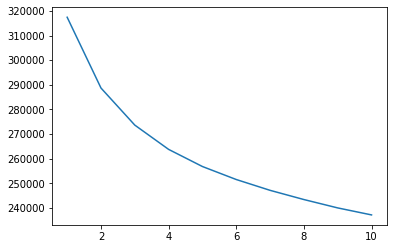

In [239]:
K = range(1,11)
sum_squared_distance = []

for k in K:
  kmeans = KMeans(n_clusters=k)
#   kmeans.fit(quant_nonull.drop('qid', axis=1))
  kmeans.fit(comp)
  sum_squared_distance.append(kmeans.inertia_)

plt.plot(K, sum_squared_distance)

In [195]:
scaler = StandardScaler()

Z = scaler.fit_transform(quant_nonull.drop('qid', axis=1))

pca = PCA()

pca.fit(Z)

comp = pca.transform(Z)

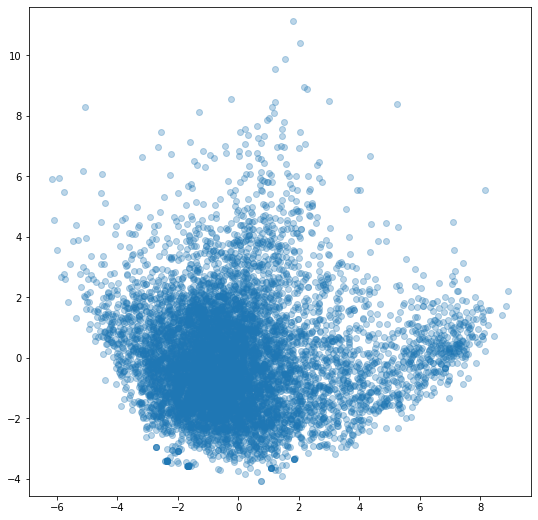

In [205]:
fig, ax = plt.subplots(figsize=[9,9])
ax.axis('equal')

ax.scatter(comp[:,0], comp[:,1], alpha=.3)

In [281]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(comp[:,0:20])

KMeans(n_clusters=3)

(4335, 4)
(2600, 4)
(1204, 4)


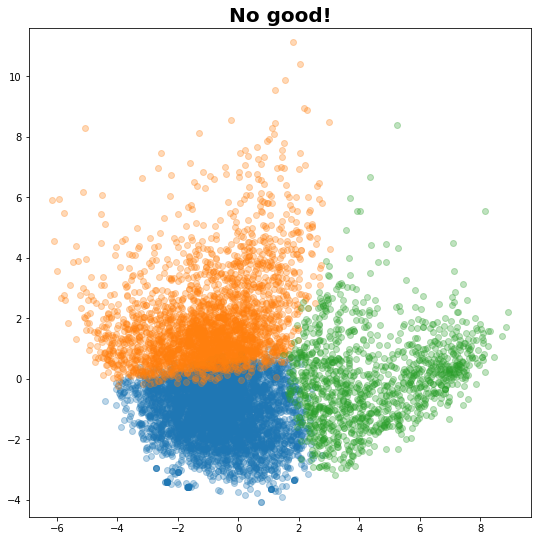

In [290]:
kf = pd.DataFrame({'pc1':comp[:,0], 'pc2':comp[:,1], 'pc3':comp[:,2], 'clus':kmeans.labels_})
kf1 = kf[kf['clus'] == 0]
kf2 = kf[kf['clus'] == 1]
kf3 = kf[kf['clus'] == 2]

fig, ax = plt.subplots(figsize=[9,9])
ax.axis('equal')

ax.scatter(kf1['pc1'], kf1['pc2'], alpha=.3)
ax.scatter(kf2['pc1'], kf2['pc2'], alpha=.3)
ax.scatter(kf3['pc1'], kf3['pc2'], alpha=.3)

print(kf1.shape)
print(kf2.shape)
print(kf3.shape)

ax.set_title('No good!', fontsize=20, fontweight='bold')

plt.show()

In [269]:
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering

In [305]:
k = 10

spec = AgglomerativeClustering(n_clusters=k)
spec.fit(comp[:,0:10])

AgglomerativeClustering(n_clusters=10)

(1215, 4)
(1998, 4)
(875, 4)
(981, 4)
(383, 4)
(494, 4)
(748, 4)
(458, 4)
(371, 4)
(616, 4)


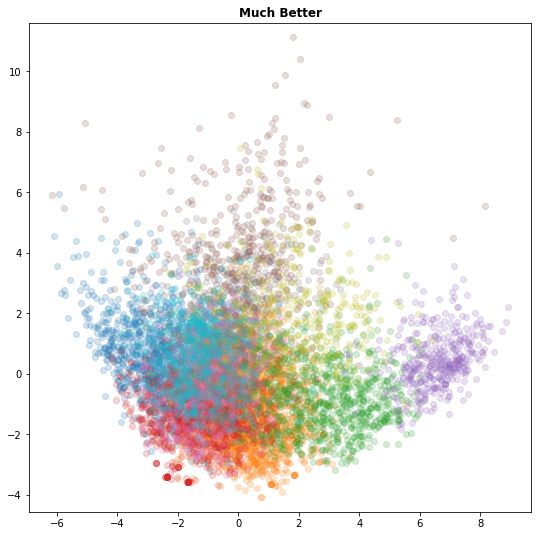

In [306]:
kf = pd.DataFrame({'pc1':comp[:,0], 'pc2':comp[:,1], 'pc3':comp[:,2], 'clus':spec.labels_})

kf_by_clus = []

for clus in range(k):
    kf_by_clus.append(kf[kf['clus'] == clus])

fig, ax = plt.subplots(figsize=[9,9])
ax.axis('equal')

for clus in range(k):
    ax.scatter(kf_by_clus[clus]['pc1'], kf_by_clus[clus]['pc2'], alpha=.2)
    print(kf_by_clus[clus].shape)

ax.set_title('Much Better', fontweight='bold')

plt.show()

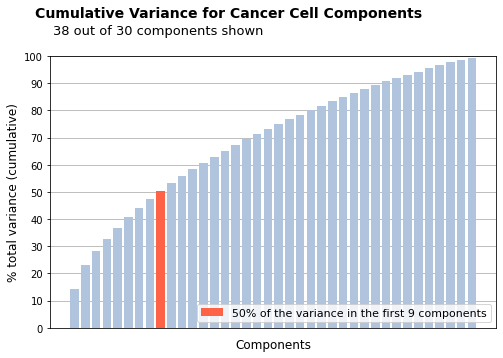

In [291]:
cum_variance_percent = np.cumsum(pca.explained_variance_ratio_)*100

fig, ax = plt.subplots(figsize=[8,5])

fig.set_facecolor('white')

ax.set_xlabel('Components', fontsize=12, labelpad=10)
ax.set_xticks([])
ax.set_ylabel('% total variance (cumulative)', fontsize=12)
ax.set_ylim([0,100])
ax.set_yticks([t*10 for t in range(11)])


#### Try changing these values! Control how many components are shown in the graph,
#### and what threshold percentage we want to check.

show = 38   
percent_thresh = 50

####
####

# Main bars
rects = ax.bar(x=[num for num in range(show)], height=cum_variance_percent[:show], color='lightsteelblue', zorder=100)

# Function to determine the point at which the threshold is passed
def percent_of_variance(rects, percent):
  for i in range(len(rects)):
    if rects[i].get_height() > percent:
      return i

# Run function and print tomato bar.
first = percent_of_variance(rects, percent_thresh)
thresh = ax.bar(x=first, height=cum_variance_percent[first], color='tomato', zorder=200)

ax.set_title('Cumulative Variance for Cancer Cell Components', fontsize=14, fontweight='bold', x=.4, y=1.12)
ax.text(s=str(show) + ' out of 30 components shown', x=-2, y=108, fontsize=13)

ax.grid(b=True, axis='y')
ax.legend([thresh],[str(percent_thresh) + '% of the variance in the first ' + str(first+1) + ' components'], loc='lower right', fontsize=11).set_zorder(300)

plt.show()